# FungiTastic - Basic Data How To

In [1]:
%reload_ext autoreload
%autoreload 2
%aimport -numpy, -pandas, -matplotlib

import sys
import yaml
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

import matplotlib.pyplot as plt
# use same font as latex
# plt.rc('text', usetex=True)

plt.rc('font', family='serif')

import pandas as pd
import os
from utils.fungi_vis import FungiTasticVis

from types import SimpleNamespace
# import SimpleNamespace

#  fix random seeds for reproducibility
import random
import numpy as np
random.seed(0)
np.random.seed(0)

/Users/jeremycui/Documents/UCB_MIDS/DATASCI207/fungitastic-classification-datasci207-Fall-2025/.dataset_demo_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load config wtih path to data etc:

In [3]:
# the config is needed for path to data only
with open('../baselines/segmentation/config/seg.yaml', "r") as f:
        cfg = yaml.safe_load(f)
        cfg = SimpleNamespace(**cfg)


## Load the datasets

In [4]:
print(os.getcwd())

/Users/jeremycui/Documents/UCB_MIDS/DATASCI207/fungitastic-classification-datasci207-Fall-2025/dataset


In [5]:
valset = FungiTasticVis(
        root=f"{os.getcwd()}/FungiTastic/",
        split='val',
        size='300',
        task='open',
        data_subset='Mini',
        transform=None,
)

trainset = FungiTasticVis(
        root=f"{os.getcwd()}/FungiTastic/",
        split='train',
        size='300',
        task='closed',
        data_subset='Mini',
        transform=None,
)

Possible parameters (assuming you have downloaded all the necessary data) are:

In [6]:
print(FungiTasticVis.SUBSETS)

dict_keys(['all', 'FewShot', 'Mini'])


In [7]:
print(FungiTasticVis.SUBSET2SIZES['Mini'])

['300', '500', '720', 'fullsize']


In [8]:
print(FungiTasticVis.SUBSET2TASKS['Mini'])

['open', 'closed']


In [9]:
print(FungiTasticVis.SUBSET2SPLITS['Mini'])

['train', 'val', 'test', 'dna']


## Load and visualize a single sample

In [10]:
idx = 1
image, cld, image_path = valset[idx]
print('Image shape:', image.size)
print('Class:', cld)
print('Image path:', image_path)
valset.show_sample(idx)



Image shape: (300, 225)
Class: 60
Image path: /Users/jeremycui/Documents/UCB_MIDS/DATASCI207/fungitastic-classification-datasci207-Fall-2025/dataset/FungiTastic/FungiTastic-Mini/val/300p/0-3424490362.JPG


## Show dataset statistics

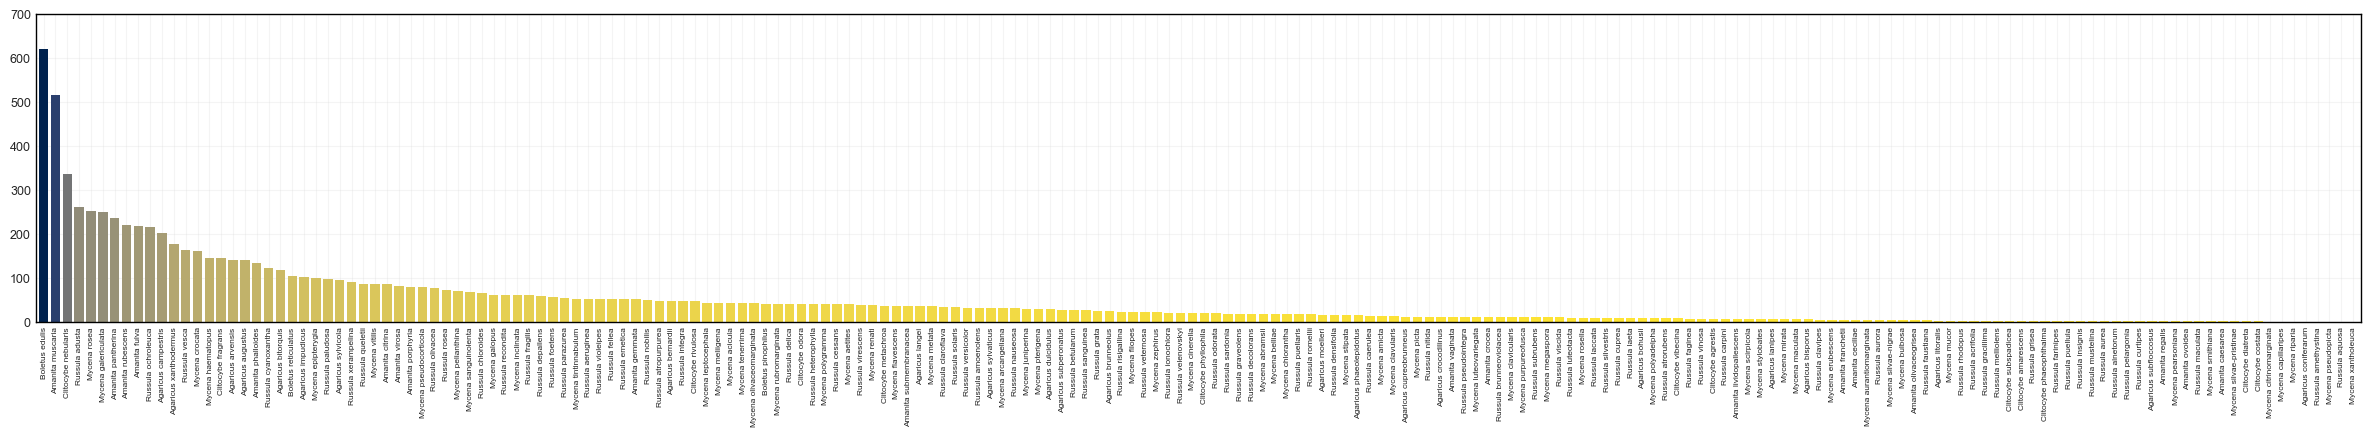

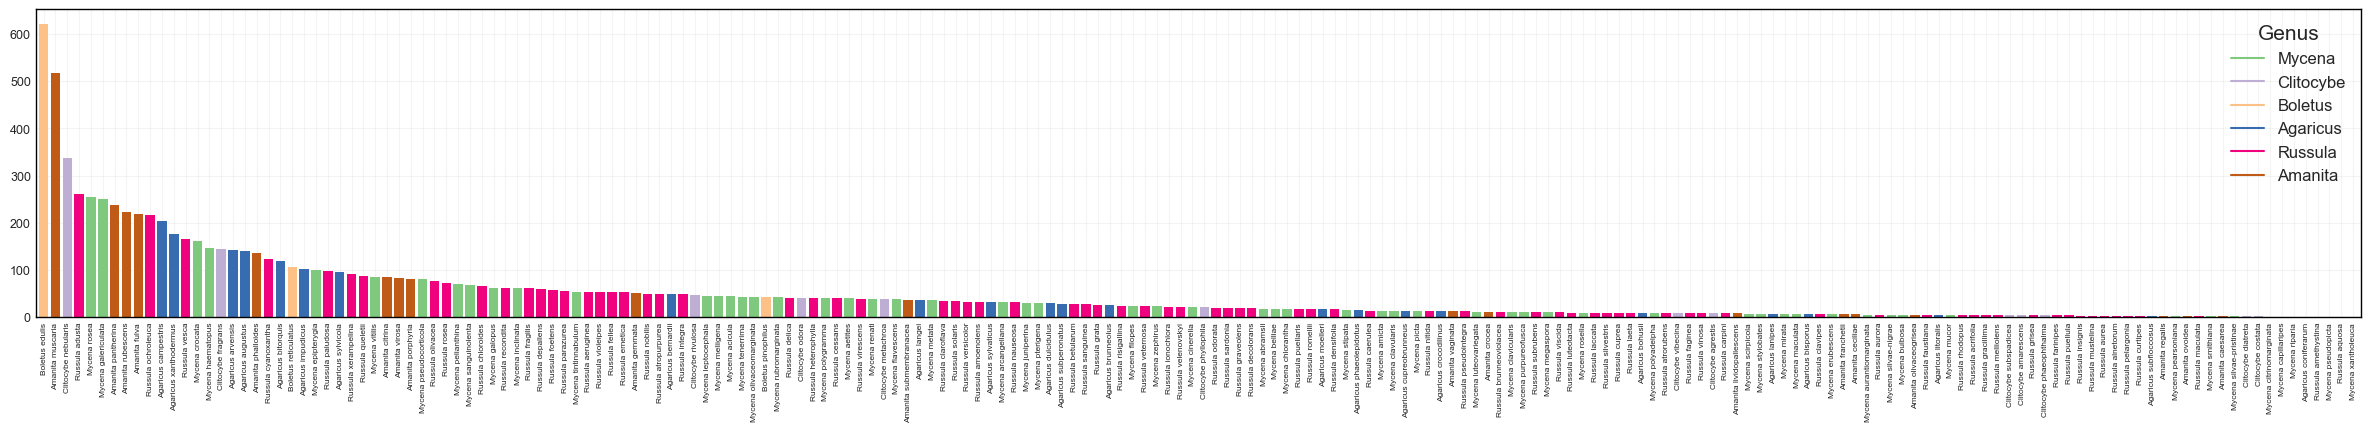

{}

In [11]:
valset.plot_label_freq()
valset.plot_species_freq(split_by_genus=True)



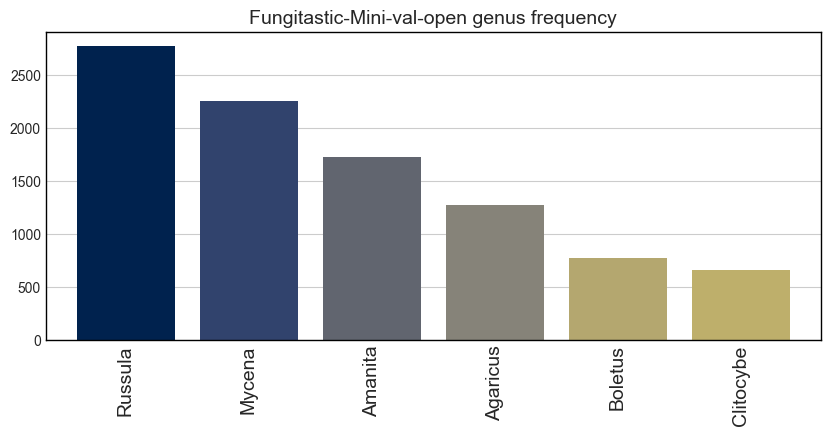

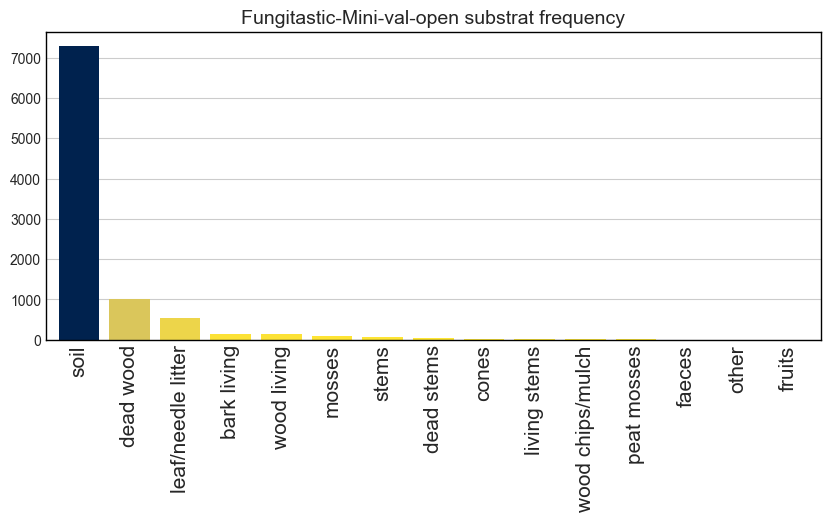

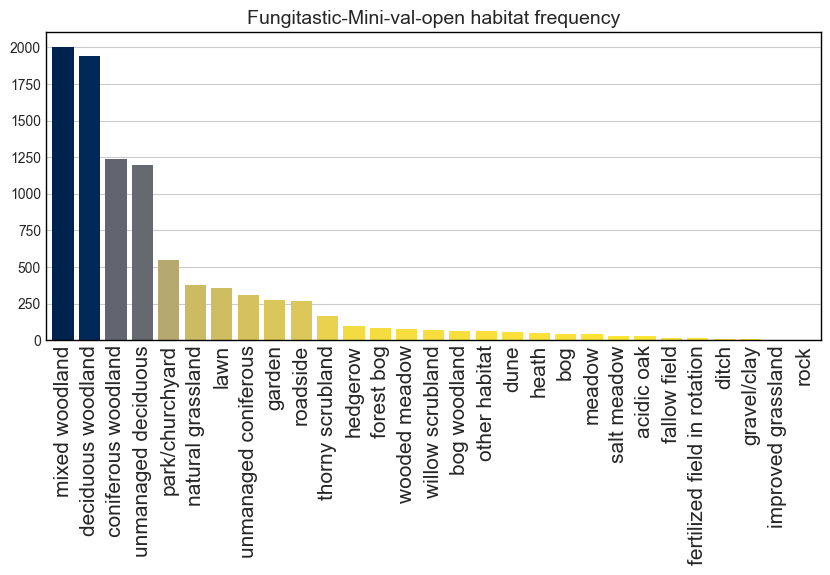

In [12]:
valset.plot_genus_freq()
valset.plot_substrat_freq()
valset.plot_habitat_freq()


## Dataset visualization

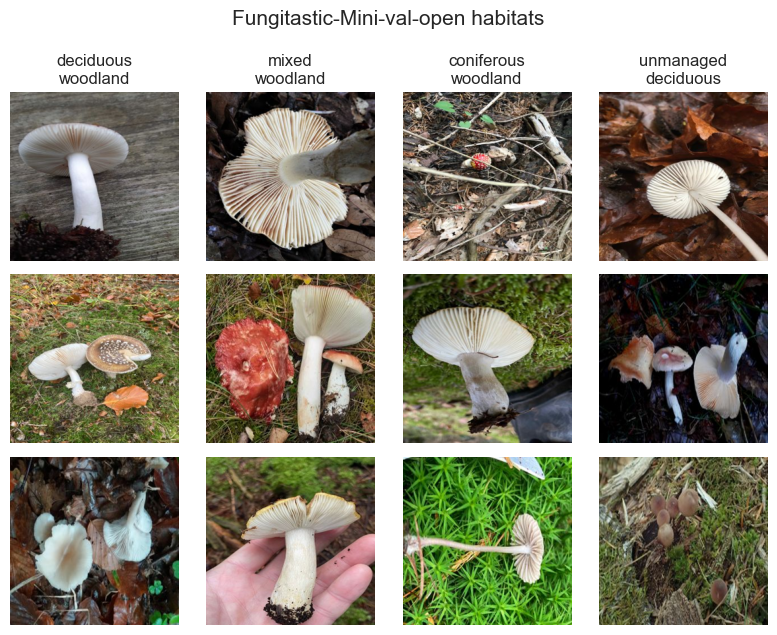

In [13]:
valset.show_habitat_examples(sample_n=3, habitat_n=4)

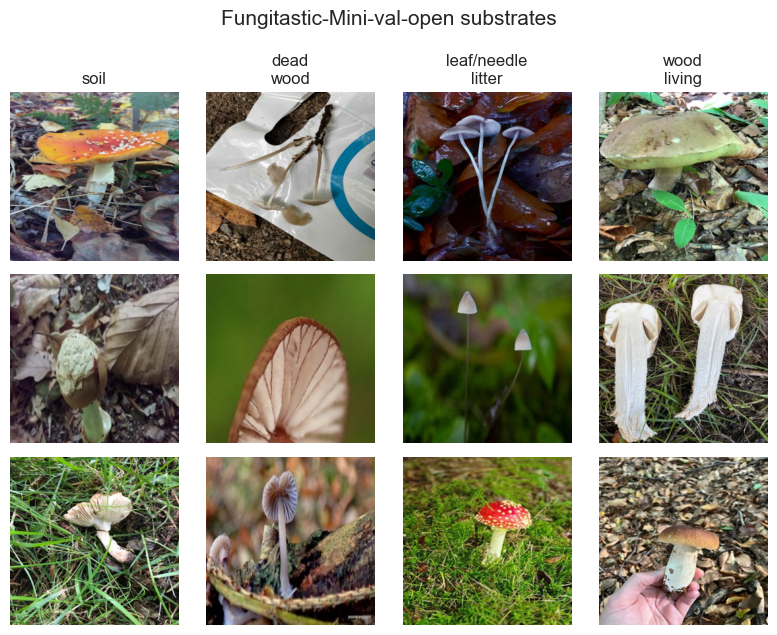

In [14]:
valset.show_substrate_examples(sample_n=3, substrate_n=4)

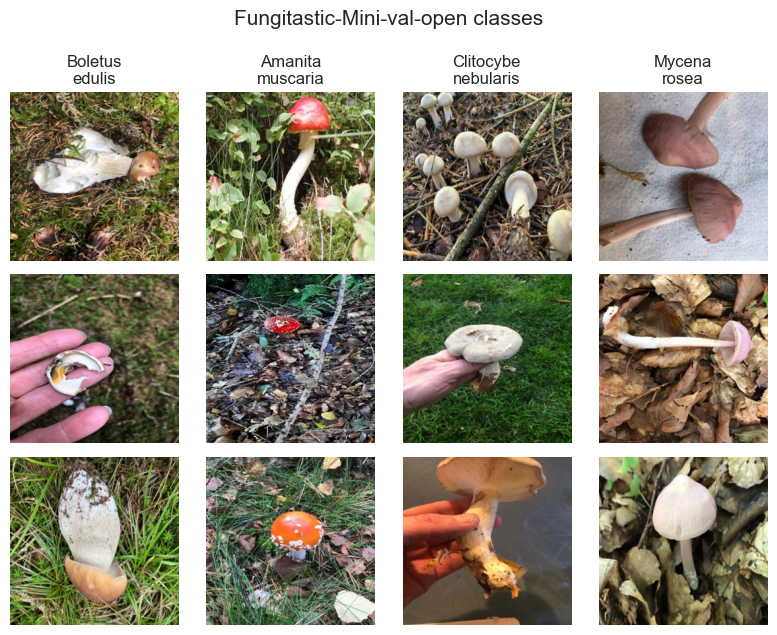

In [15]:
valset.show_all_class_examples(sample_n=3, class_n=4)